Data Loaded. Total Samples: 2036

 Data Split 
Training Set: 1628 samples
Testing Set:  408 samples

--- Model Parameters (Learned from Scratch) ---
Slope (m):     1.0001
Intercept (c): 0.0895
Equation:      y = 1.0001x + 0.0895

 Evaluation on Test Set
RMSE:     3.2898
R² Score: 0.9797


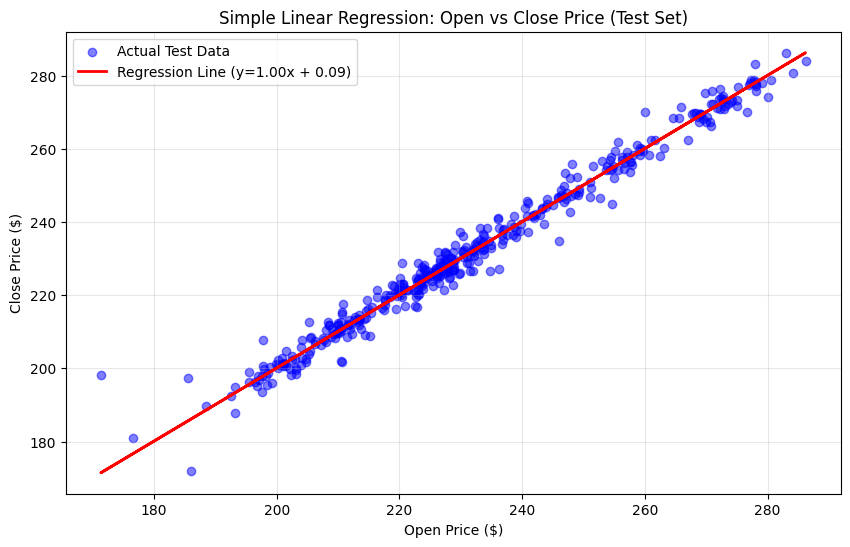

In [ ]:
# PART B - SIMPLE LINEAR REGRESSION

# Goal: Predict 'Close' price using only 'Open' price via OLS formulas.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# DATA LOADING & SELECTION
# We load the dataset and select only the 2 columns we need for "Simple" regression.
df_raw = pd.read_csv('stock_market_data.csv', header=[0,1])

data = pd.DataFrame()
data['x'] = df_raw['Open']['AAPL']  # Feature (Independent Variable)
data['y'] = df_raw['Close']['AAPL'] # Target (Dependent Variable)

# Drop NaNs to ensure mathematical stability
data = data.dropna()
print(f"Data Loaded. Total Samples: {len(data)}")


# TRAIN-TEST SPLIT (80% - 20%)

total_samples = len(data)
split_index = int(total_samples * 0.80)

# Slicing the arrays
X_train = data['x'].values[:split_index]
X_test  = data['x'].values[split_index:]

y_train = data['y'].values[:split_index]
y_test  = data['y'].values[split_index:]

print(f"\n Data Split ")
print(f"Training Set: {len(X_train)} samples")
print(f"Testing Set:  {len(X_test)} samples")

# TRAINING: CALCULATING SLOPE (m) AND INTERCEPT (c)
# Formula: m = Σ((x - x̄)(y - ȳ)) / Σ((x - x̄)²)

x_mean = sum(X_train) / len(X_train)
y_mean = sum(y_train) / len(y_train)

# Calculate Numerator (Covariance) and Denominator (Variance)
numerator = 0
denominator = 0

for i in range(len(X_train)):
    numerator += (X_train[i] - x_mean) * (y_train[i] - y_mean)
    denominator += (X_train[i] - x_mean) ** 2

# Compute Slope (m) and Intercept (c)
m = numerator / denominator
c = y_mean - (m * x_mean)

print("\n--- Model Parameters (Learned from Scratch) ---")
print(f"Slope (m):     {m:.4f}")
print(f"Intercept (c): {c:.4f}")
print(f"Equation:      y = {m:.4f}x + {c:.4f}")

# PREDICTION & EVALUATION

# Make Predictions: y_pred = mx + c
y_pred = [m * x + c for x in X_test]

# Metric 1: RMSE (Root Mean Squared Error)
# RMSE = sqrt( Σ(y_true - y_pred)² / N )
mse = sum((y_test[i] - y_pred[i])**2 for i in range(len(y_test))) / len(y_test)
rmse = mse ** 0.5

# Metric 2: R-Squared (R²)
# R² = 1 - (SS_Residual / SS_Total)
y_test_mean = sum(y_test) / len(y_test)
ss_res = sum((y_test[i] - y_pred[i])**2 for i in range(len(y_test)))
ss_tot = sum((y_test[i] - y_test_mean)**2 for i in range(len(y_test)))
r2 = 1 - (ss_res / ss_tot)

print("\n Evaluation on Test Set")
print(f"RMSE:     {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


#  VISUALIZATION
plt.figure(figsize=(10, 6))

# Plot Actual Data points
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Test Data')

# Plot Regression Line
plt.plot(X_test, y_pred, color='red', linewidth=2, label=f'Regression Line (y={m:.2f}x + {c:.2f})')

plt.title('Simple Linear Regression: Open vs Close Price (Test Set)')
plt.xlabel('Open Price ($)')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()